In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [11]:
# Update this path accordingly
path = "/content/drive/MyDrive/Mulbary_disease_prediction/Dataset/Mulberry_Data"


In [12]:
# Function to count images in each folder
def count_images_in_folders(directory):
    folder_image_count = {}
    for folder_name in os.listdir(directory):
        folder_path = os.path.join(directory, folder_name)
        if os.path.isdir(folder_path):
            image_count = len([f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
            folder_image_count[folder_name] = image_count
    return folder_image_count

# Get the count of images in each folder
image_counts = count_images_in_folders(path)

# Convert the dictionary to a DataFrame
label_counts = pd.DataFrame(list(image_counts.items()), columns=['Class', 'Count'])

# Display the class counts
print(label_counts)

             Class  Count
0   Healthy_Leaves    200
1      Rust_leaves    200
2      Spot_leaves    200
3    Yellow_leaves    200
4  deformed_leaves    200


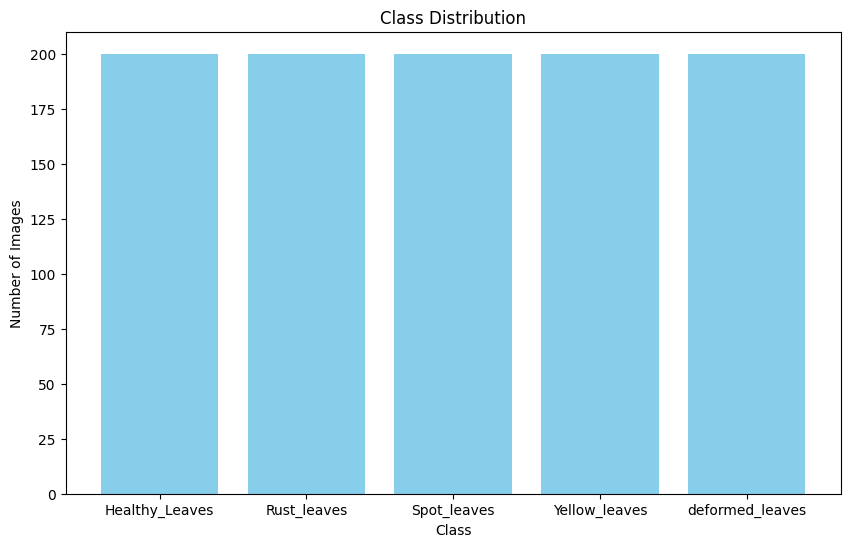

In [13]:
# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(label_counts['Class'], label_counts['Count'], color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.show()

In [14]:
# Displaying sample images from the dataset
plt.figure(figsize=(12, 12))


<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

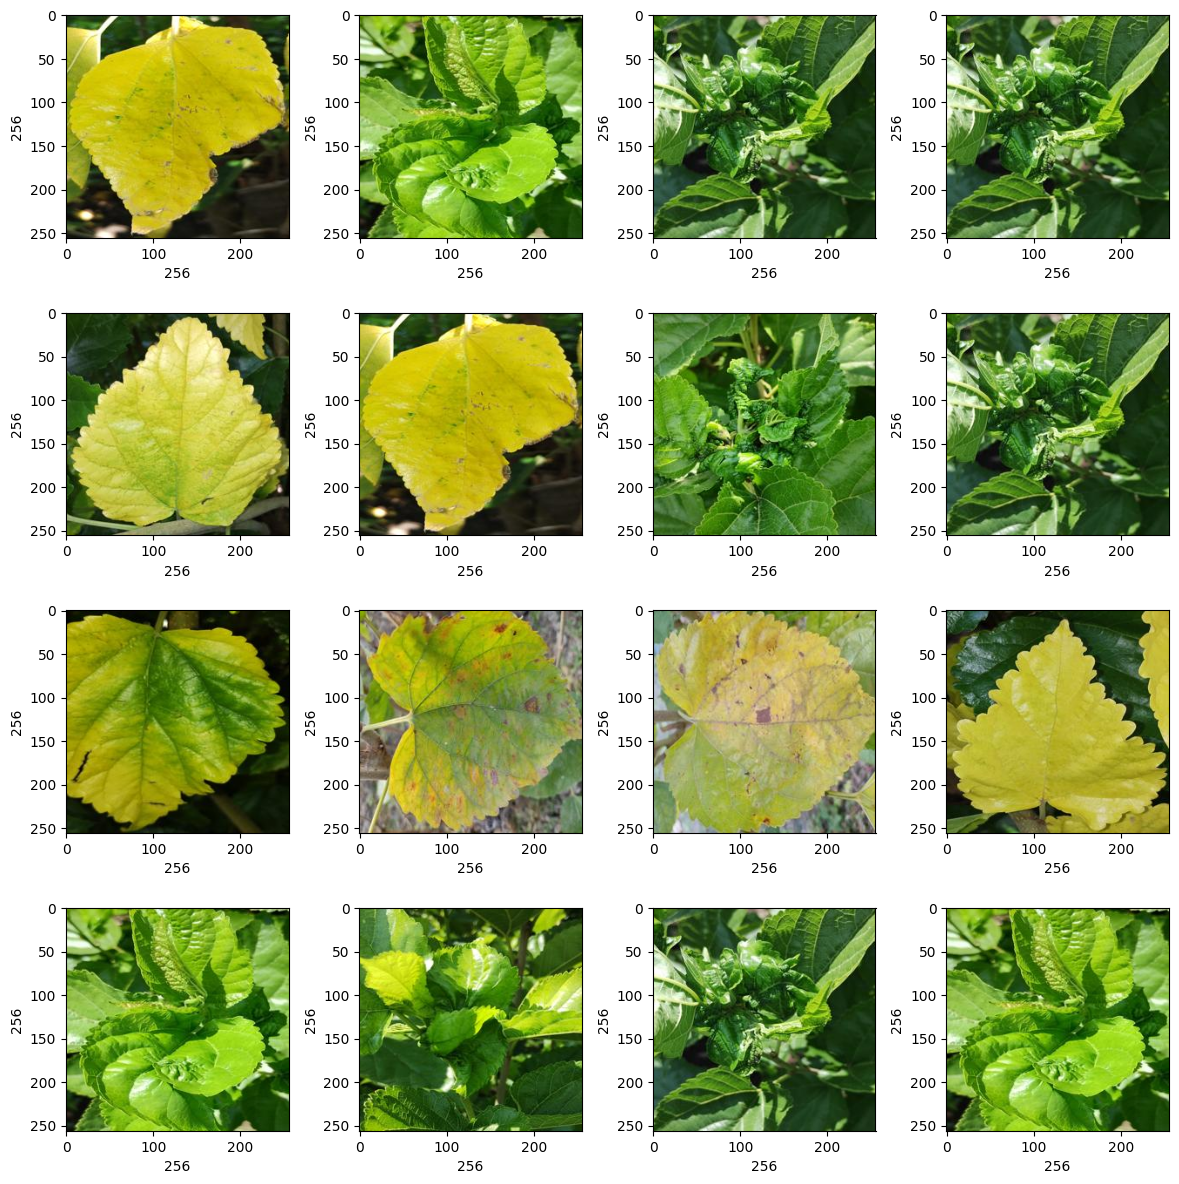

In [15]:
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Set the figure size
plt.figure(figsize=(12, 12))

# Update this path accordingly
path = "/content/drive/MyDrive/Mulbary_disease_prediction/Dataset/Mulberry_Data"

# Get a list of all image files in the directory and its subdirectories
image_files = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):  # Add more extensions if needed
            image_files.append(os.path.join(root, file))

# Plot the images
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img_path = random.choice(image_files)
    rand_img = imread(rand_img_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize=10)  # width of the image
    plt.ylabel(rand_img.shape[0], fontsize=10)  # height of the image

# Display the plot
plt.show()


In [16]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, (256, 256))  # Resizing to 256x256 pixels
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

# Lists to hold the image arrays and labels
image_list, label_list = [], []

# Define your categories and their corresponding labels
all_labels = ['Healthy_Leaves', 'Rust_leaves', 'Spot_leaves', 'deformed_leaves', 'Yellow_leaves']
binary_labels = [0, 1, 2, 3, 4]  # Your label mapping

# Convert images to arrays and assign labels
for directory in all_labels:
    plant_image_list = listdir(f"{path}/{directory}")
    for files in plant_image_list:
        image_path = f"{path}/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[all_labels.index(directory)])

# Convert lists to NumPy arrays
image_list = np.array(image_list)
label_list = np.array(label_list)

# Normalize the images
image_list = image_list.astype('float32') / 255.0
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

In [17]:
# Reshape
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)



In [18]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [21]:
# Model architecture
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(64, (3, 3), padding="same", input_shape=(256, 256, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(all_labels), activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

# Splitting the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=10)

# Training the model
epochs = 50
batch_size = 64
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.3068 - loss: 1.7999 - val_accuracy: 0.9187 - val_loss: 0.7578
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 310ms/step - accuracy: 0.8393 - loss: 0.6546 - val_accuracy: 0.9000 - val_loss: 0.2992
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 311ms/step - accuracy: 0.8726 - loss: 0.3318 - val_accuracy: 0.8813 - val_loss: 0.2952
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 311ms/step - accuracy: 0.9130 - loss: 0.2697 - val_accuracy: 0.8687 - val_loss: 0.3319
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 318ms/step - accuracy: 0.9071 - loss: 0.2551 - val_accuracy: 0.9062 - val_loss: 0.2372
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 312ms/step - accuracy: 0.9263 - loss: 0.1738 - val_accuracy: 0.9375 - val_loss: 0.1616
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 318ms/step - accuracy: 0.9607 - loss: 0.1429 - val_accuracy: 0.9375 - val_loss: 0.1712
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 323ms/step - accuracy: 0.9467 - loss: 0.1453 - val_accuracy: 0.93

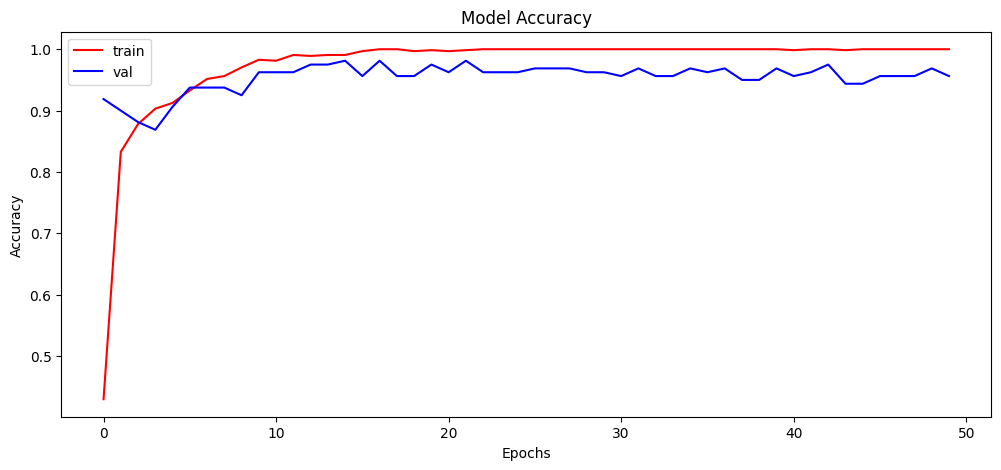

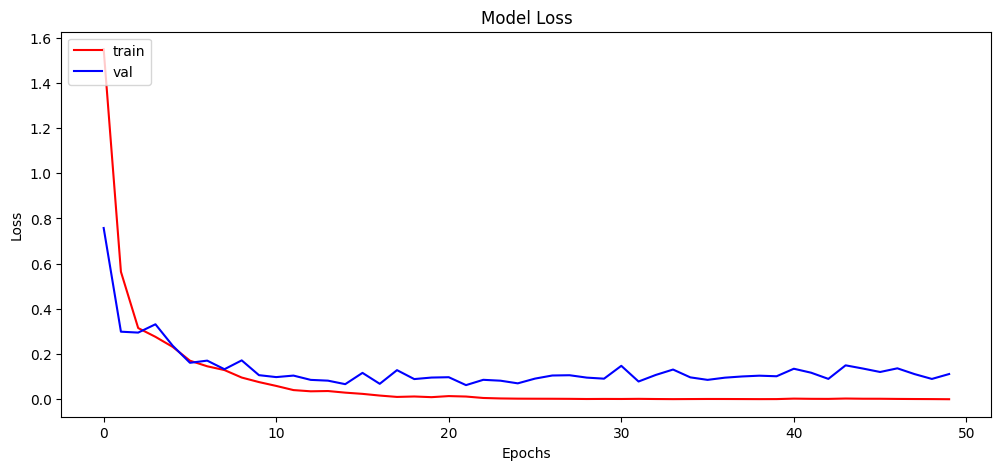

In [22]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [23]:
# Evaluating model performance
print("Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1] * 100:.2f}%")


Calculating model accuracy
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 459ms/step - accuracy: 0.9479 - loss: 0.2125
Test Accuracy: 95.00%


In [24]:
y_pred = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


In [25]:
# Visualizing original and predicted labels for the test images
img = array_to_img(x_test[26])
img.show()

print(f"Original Label: {all_labels[np.argmax(y_test[26])]}")
print(f"Predicted Label: {all_labels[np.argmax(y_pred[26])]}")
for i in range(50):
    print(f"{all_labels[np.argmax(y_test[i])]} - {all_labels[np.argmax(y_pred[i])]}")

Original Label: Rust_leaves
Predicted Label: Rust_leaves
Yellow_leaves - Yellow_leaves
Yellow_leaves - Yellow_leaves
Spot_leaves - Spot_leaves
Healthy_Leaves - Healthy_Leaves
deformed_leaves - deformed_leaves
Yellow_leaves - Yellow_leaves
Healthy_Leaves - Healthy_Leaves
Rust_leaves - Rust_leaves
Healthy_Leaves - Healthy_Leaves
Healthy_Leaves - Rust_leaves
deformed_leaves - deformed_leaves
Spot_leaves - Spot_leaves
Healthy_Leaves - Healthy_Leaves
Yellow_leaves - Yellow_leaves
Rust_leaves - Rust_leaves
Spot_leaves - Spot_leaves
Yellow_leaves - Yellow_leaves
Yellow_leaves - Yellow_leaves
deformed_leaves - deformed_leaves
Rust_leaves - Rust_leaves
Yellow_leaves - Yellow_leaves
Rust_leaves - Rust_leaves
Healthy_Leaves - Healthy_Leaves
Rust_leaves - Rust_leaves
Spot_leaves - Spot_leaves
Healthy_Leaves - Healthy_Leaves
Rust_leaves - Rust_leaves
Yellow_leaves - Yellow_leaves
Healthy_Leaves - Healthy_Leaves
Yellow_leaves - Yellow_leaves
Rust_leaves - Rust_leaves
Spot_leaves - Spot_leaves
Rust_l

In [26]:
# Saving the model
model.save("/content/drive/MyDrive/Mulbary_disease_prediction/Model/mulberry_leaf_disease_model_enhanced5.h5")  # Update the path accordingly